#*Ramel Cary B. Jamen - 2019-2093*

#Refererence:

Abhishek. “Introduction to Polynomial Regression (with Python Implementation).” Analytics Vidhya, 15 Mar. 2020, www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/? Accessed 3 Oct. 2024.


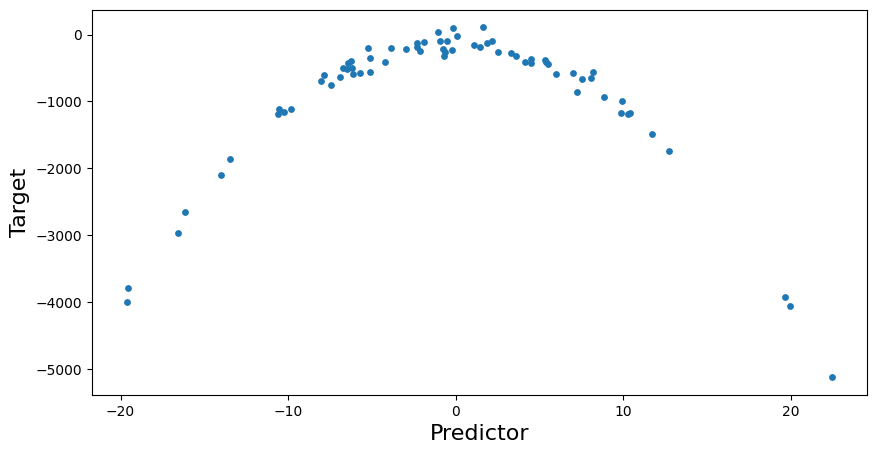

In [107]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# for calculating mean_squared error
from sklearn.metrics import mean_squared_error

# creating a dataset with curvilinear relationship
x=10*np.random.normal(0,1,70)
y=10*(-x**2)+np.random.normal(-100,100,70)

# plotting dataset
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [108]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Training Model
lm=LinearRegression()
lm.fit(x.reshape(-1,1),y.reshape(-1,1))

LinearRegression()

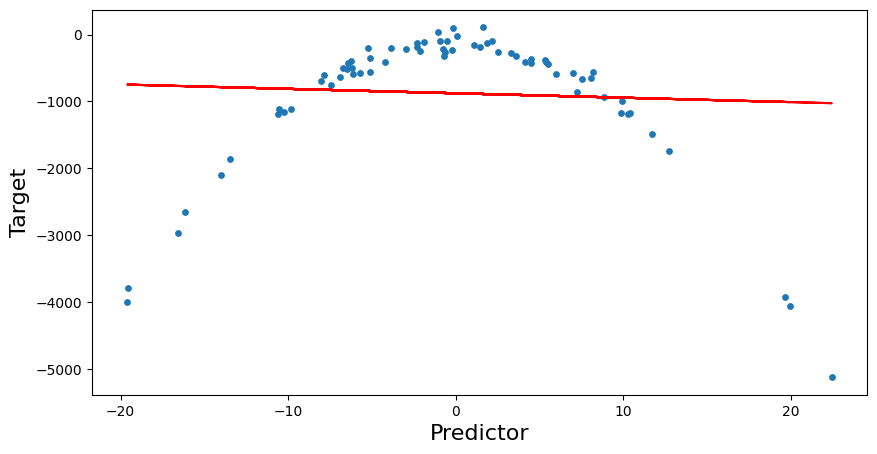

In [109]:
y_pred=lm.predict(x.reshape(-1,1))

# plotting predictions
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [110]:
print('RMSE for Linear Regression=>', np.sqrt(mean_squared_error(y,y_pred)))

RMSE for Linear Regression=> 1092.2337566218928


In [111]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline

# creating pipeline and fitting it on data
Input=[('polynomial', PolynomialFeatures(degree=2)), ('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [112]:
poly_pred=pipe.predict(x.reshape(-1,1))

print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))

RMSE for Polynomial Regression=> 97.16695326712376


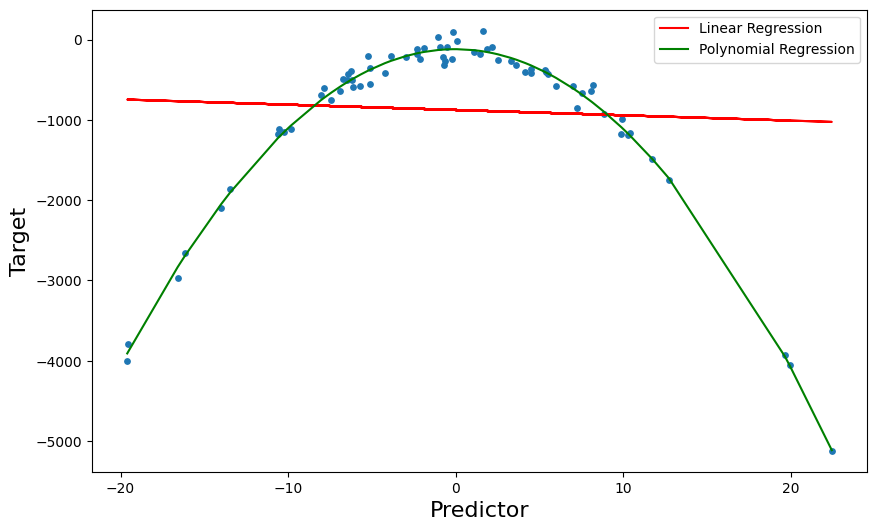

In [113]:
# Sorting for visualization
sorted_zip = sorted(zip(x, poly_pred))
x_poly, poly_pred_sorted = zip(*sorted_zip)

# Plotting
plt.figure(figsize=(10,6))
plt.scatter(x, y, s=15)
plt.plot(x, y_pred, color='r', label='Linear Regression')
plt.plot(x_poly, poly_pred_sorted, color='g', label='Polynomial Regression')
plt.xlabel('Predictor', fontsize=16)
plt.ylabel('Target', fontsize=16)
plt.legend()
plt.show()

# Changes made:

1. Moved the RMSE calculation for polynomial regression before the sorting step.
   - This ensures that the RMSE is calculated using the original order of predictions,
     which matches the order of the actual y values.

2. Renamed 'poly_pred' to 'poly_pred_sorted' after sorting.
   - This clarifies that the sorted version is used only for visualization purposes.

3. Updated the plotting code to use 'poly_pred_sorted' instead of 'poly_pred'.
   - This ensures that the visualization is correct while maintaining accurate RMSE calculation.

These changes address the issue of incorrect RMSE calculation for the polynomial regression
model while preserving the correct visualization of the regression lines.